In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883
2021-01-05,3223.379883,3165.060059,3166.010010,3218.510010,2655500,3218.510010
2021-01-06,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883
2021-01-07,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912
2021-01-08,3190.639893,3142.199951,3180.000000,3182.699951,3537700,3182.699951
...,...,...,...,...,...,...
2022-03-29,3416.629883,3357.370117,3407.679932,3386.300049,3307700,3386.300049
2022-03-30,3379.010010,3310.000000,3370.189941,3326.020020,2808400,3326.020020
2022-03-31,3329.899902,3259.070068,3328.899902,3259.949951,2998300,3259.949951


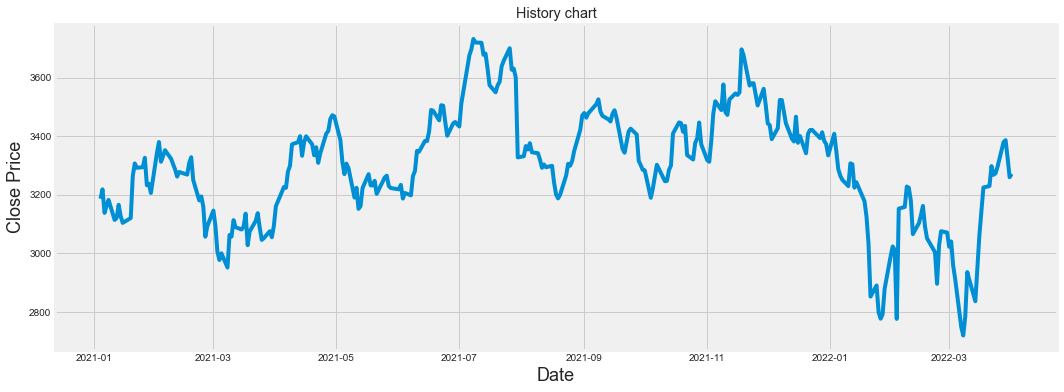

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.46121123],
       [0.49274076],
       [0.41349187],
       [0.43701037],
       [0.45732452],
       [0.38958776],
       [0.39613507],
       [0.44069933],
       [0.40270194],
       [0.37973733],
       [0.39606577],
       [0.53711717],
       [0.58024767],
       [0.56564999],
       [0.56740054],
       [0.59917707],
       [0.50665609],
       [0.5116407 ],
       [0.48056608],
       [0.61574286],
       [0.65245475],
       [0.58572678],
       [0.60399363],
       [0.62491093],
       [0.59602221],
       [0.57827957],
       [0.56006222],
       [0.53588092],
       [0.55128965],
       [0.54262598],
       [0.58187943],
       [0.60125407],
       [0.52378544],
       [0.45538612],
       [0.4689948 ],
       [0.43440941],
       [0.33316512],
       [0.36854176],
       [0.42116654],
       [0.37012426],
       [0.28157884],
       [0.25445057],
       [0.27708873],
       [0.22911221],
       [0.33879273],
       [0.33363982],
       [0.3889747 ],
       [0.365

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.46121123, 0.49274076, 0.41349187, 0.43701037, 0.45732452,
       0.38958776, 0.39613507, 0.44069933, 0.40270194, 0.37973733,
       0.39606577, 0.53711717, 0.58024767, 0.56564999, 0.56740054,
       0.59917707, 0.50665609, 0.5116407 , 0.48056608, 0.61574286,
       0.65245475, 0.58572678, 0.60399363, 0.62491093, 0.59602221,
       0.57827957, 0.56006222, 0.53588092, 0.55128965, 0.54262598,
       0.58187943, 0.60125407, 0.52378544, 0.45538612, 0.4689948 ,
       0.43440941, 0.33316512, 0.36854176, 0.42116654, 0.37012426,
       0.28157884, 0.25445057, 0.27708873, 0.22911221, 0.33879273,
       0.33363982, 0.3889747 , 0.36513964, 0.35741548, 0.3674837 ,
       0.41087111, 0.304316  , 0.35076941, 0.38628464, 0.41262166,
       0.36274634, 0.32238509, 0.32809165, 0.35153096, 0.33131581])]
[0.36967925270436375]

[array([0.46121123, 0.49274076, 0.41349187, 0.43701037, 0.45732452,
       0.38958776, 0.39613507, 0.44069933, 0.40270194, 0.37973733,
       0.39606577, 0.53711717, 0.58

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 3s 146ms/step - loss: 0.3109
Epoch 2/256
2/2 [==============================] - 0s 129ms/step - loss: 0.0506
Epoch 3/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0771
Epoch 4/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0227
Epoch 5/256
2/2 [==============================] - 0s 138ms/step - loss: 0.0322
Epoch 6/256
2/2 [==============================] - 0s 127ms/step - loss: 0.0411
Epoch 7/256
2/2 [==============================] - 0s 126ms/step - loss: 0.0345
Epoch 8/256
2/2 [==============================] - 0s 130ms/step - loss: 0.0226
Epoch 9/256
2/2 [==============================] - 0s 133ms/step - loss: 0.0176
Epoch 10/256
2/2 [==============================] - 0s 128ms/step - loss: 0.0228
Epoch 11/256
2/2 [==============================] - 0s 128ms/step - loss: 0.0250
Epoch 12/256
2/2 [==============================] - 0s 139ms/step - loss: 0.0204
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

107.42663657728251

C:\Users\ASUS\AppData\Local\Temp/ipykernel_11524/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


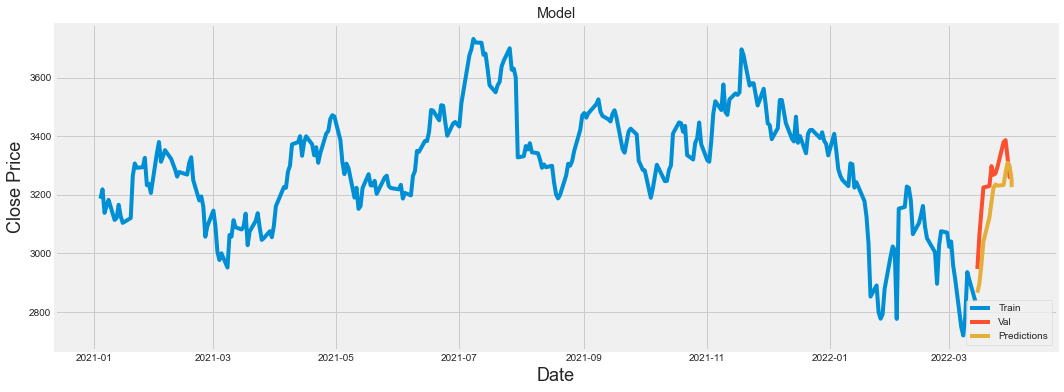

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,2947.330078,2866.098877
2022-03-16,3062.080078,2897.463867
2022-03-17,3144.780029,2961.954346
2022-03-18,3225.010010,3040.326660
2022-03-21,3229.830078,3123.304443
2022-03-22,3297.780029,3174.875488
2022-03-23,3268.159912,3224.353271
2022-03-24,3272.989990,3234.842773
2022-03-25,3295.469971,3231.271729
